In [1]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
from library.experiments import *
%matplotlib inline
SEED = 23191

**naming of objective function**
ackley -> ak 

tuned ackley -> tak

bukin -> bk

egg holder -> eh

**naming of optimizer**

original CMA -> no

line search CMA-> ls

round off CMA-> ro

**naming of experiments**

experiments -> exps + objective function + optimizer + [hyperparameter]

In [4]:
def setup_compsite_cma(inner_opt):
    # One experiment: setup optimizer
    cma = cma_es()
    optmizerParas = {
             'x0': np.zeros((2,)),
             'std': np.ones((2,)) * 3, 
             'tol': 1e-5, 
             'adjust_func': inner_opt, 
             'record': False, 
             'verbose': True}
    cma.set_parameters(optmizerParas)
    return cma
    
def compare_efficiency_ackley(optimizer, seed):
    np.random.seed(seed)

    # init multiple experiments
    mexps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()
    # One experiment: setup objective function
    ak = ackley()
    exp.set_objective(ak)
    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    mexps.set_single_exp(exp)
    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([0,0]),
             'edge': np.array([500, 500]),
             'step': 100,
             'size': 10,
             'sym': True}
    mexps.set_sample_zone(zoneParas)

    data = mexps.do()
    
    num = zoneParas['edge'][0] / zoneParas['step']
    num = (num + 1) * num / 2
    print("avg probility of converge: ", data['res'].sum() / num)
    print("avg func value: ", data['cost'].sum() / num)
    print("avg evals per exp: ", data['evals'].sum() / num)
    print("\n")

In [29]:
inner_optimizer = do_nothing()
composite_optimizer = setup_compsite_cma(inner_optimizer)
for i in [1291, 3, 100, 29383, 3322, 902, 222]:
    %time conmpare_efficency_ackley(composite_optimizer, i)

avg probility of converge:  0.02666666666666667
avg func value:  19.831645846483443
avg evals per exp:  1480.4799999999998


CPU times: user 14.2 s, sys: 134 ms, total: 14.3 s
Wall time: 14.5 s
avg probility of converge:  0.013333333333333334
avg func value:  20.065190191781713
avg evals per exp:  1470.84


CPU times: user 14 s, sys: 117 ms, total: 14.1 s
Wall time: 14.3 s
diverge, raise LinAlgError!
avg probility of converge:  0.02
avg func value:  19.91107105638078
avg evals per exp:  1493.9200000000003


CPU times: user 14.8 s, sys: 158 ms, total: 15 s
Wall time: 15.1 s
avg probility of converge:  0.03333333333333333
avg func value:  19.675662087266524
avg evals per exp:  1446.6000000000001


CPU times: user 13 s, sys: 70.3 ms, total: 13.1 s
Wall time: 13.2 s
avg probility of converge:  0.02666666666666667
avg func value:  19.74227867506498
avg evals per exp:  1387.2


CPU times: user 12 s, sys: 34.5 ms, total: 12 s
Wall time: 12.1 s
avg probility of converge:  0.02666666666666667
a

# 1. orginal Ackley function

## no optimisation


In [42]:
no = do_nothing()
%time compare_efficiency_ackley(no, seed=SEED)

avg probility of converge:  0.0
avg func value:  21.553441979953742
avg evals per exp:  1.0


CPU times: user 9.52 ms, sys: 2.19 ms, total: 11.7 ms
Wall time: 9.59 ms


## orginal CMA + original Ackley

In [33]:
inner_optimizer = do_nothing()
composite_optimizer = setup_compsite_cma(inner_optimizer)
%time compare_efficiency_ackley(composite_optimizer, seed=SEED)

avg probility of converge:  0.02666666666666667
avg func value:  19.821937003313206
avg evals per exp:  1459.48


CPU times: user 12.6 s, sys: 22.9 ms, total: 12.6 s
Wall time: 12.6 s


In [39]:
# time per evalutations (s)
12.6 / 150 / 1459

5.7573680603152835e-05

## adam-CMA + original Ackley

In [9]:
inner_optimizer = adam()
optmizerParas = {'x0': np.zeros((2,)),
         'alpha': 0.1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-8, 
         'max_iter': 100,
         'tol': 1e-2,              
         'verbose': False,
         'record': False}
inner_optimizer.set_parameters(optmizerParas)
composite_optimizer = setup_compsite_cma(inner_optimizer)
%time compare_efficiency_ackley(composite_optimizer, seed=SEED)

*******starting optimisation from intitial mean:  [62.31808046 75.84826838]
eigenvalue of variance = [0.01415398 0.01235012]
total iterations = 400, total evaluatios = 240000
found minimum position = [-0.00201629 -0.00231589], found minimum = 0.008936117098848673

Result:  global minimum
found minimum: 0.008936117098848673, minimum position: [-0.00201629 -0.00231589], evals: 240000
*******starting optimisation from intitial mean:  [50.71988059 46.0777404 ]
eigenvalue of variance = [0.00168769 0.00099999]
total iterations = 400, total evaluatios = 240000
found minimum position = [-0.00070705 -0.00486304], found minimum = 0.014542306915523273

Result:  global minimum
found minimum: 0.014542306915523273, minimum position: [-0.00070705 -0.00486304], evals: 240000
*******starting optimisation from intitial mean:  [71.70104317 57.71956938]
eigenvalue of variance = [0.00299286 0.0022693 ]
total iterations = 400, total evaluatios = 239986
found minimum position = [0.00010315 0.00597458], found

eigenvalue of variance = [0.00882702 0.00010008]
total iterations = 400, total evaluatios = 239963
found minimum position = [1867022.00020724  314700.999665  ], found minimum = 20.000004163046906

Result:  local minimum
found minimum: 20.000004163046906, minimum position: [1867022.00020724  314700.999665  ], evals: 239963
*******starting optimisation from intitial mean:  [181.09159663 130.43987676]
eigenvalue of variance = [0.45098025 4.62409895]
total iterations = 40, total evaluatios = 23963
found minimum position = [174.00006112 132.00032987], found minimum = 20.000003019444932

Result:  local minimum
found minimum: 20.000003019444932, minimum position: [174.00006112 132.00032987], evals: 23963
*******starting optimisation from intitial mean:  [199.03600867 173.34868647]
eigenvalue of variance = [0.02822145 3.8369606 ]
total iterations = 90, total evaluatios = 54000
found minimum position = [200.00003547 153.00006107], found minimum = 20.00000013380432

Result:  local minimum
found 

eigenvalue of variance = [0.76309923 6.02063038]
total iterations = 32, total evaluatios = 19195
found minimum position = [250.99984016 139.00026503], found minimum = 20.000002569875242

Result:  local minimum
found minimum: 20.000002569875242, minimum position: [250.99984016 139.00026503], evals: 19195
*******starting optimisation from intitial mean:  [202.74864615 151.66765793]
eigenvalue of variance = [0.79276048 0.28122801]
total iterations = 99, total evaluatios = 59362
found minimum position = [208.00014228 162.99983989], found minimum = 20.000001230813126

Result:  local minimum
found minimum: 20.000001230813126, minimum position: [208.00014228 162.99983989], evals: 59362
*******starting optimisation from intitial mean:  [270.7054224  163.64179216]
eigenvalue of variance = [0.00188501 0.00055781]
total iterations = 400, total evaluatios = 239982
found minimum position = [-1933.00038891  -818.00027592], found minimum = 20.000006100327372

Result:  local minimum
found minimum: 20.

eigenvalue of variance = [3.90677117e-06 5.62494880e-03]
total iterations = 400, total evaluatios = 239968
found minimum position = [-5.86147000e+05  1.53391858e+09], found minimum = 20.000008077024045

Result:  local minimum
found minimum: 20.000008077024045, minimum position: [-5.86147000e+05  1.53391858e+09], evals: 239968
*******starting optimisation from intitial mean:  [394.52089768  28.08019899]
eigenvalue of variance = [2.55221129 1.66013382]
total iterations = 25, total evaluatios = 15000
found minimum position = [397.99985108  30.99990409], found minimum = 20.000000841767804

Result:  local minimum
found minimum: 20.000000841767804, minimum position: [397.99985108  30.99990409], evals: 15000
*******starting optimisation from intitial mean:  [315.02831003  69.71978617]
eigenvalue of variance = [9.11949110e-06 8.70803855e-03]
total iterations = 339, total evaluatios = 203321
found minimum position = [40524.00005706 37677.00003461], found minimum = 20.000000119493336

Result:  l

eigenvalue of variance = [0.00462215 0.00629044]
total iterations = 400, total evaluatios = 239968
found minimum position = [-0.00600755 -0.0006608 ], found minimum = 0.01806676030326715

Result:  global minimum
found minimum: 0.01806676030326715, minimum position: [-0.00600755 -0.0006608 ], evals: 239968
*******starting optimisation from intitial mean:  [382.42092174 250.50495498]
eigenvalue of variance = [3.41954317e-05 4.80320821e-02]
total iterations = 400, total evaluatios = 240000
found minimum position = [  23402.99983131 3231988.99974135], found minimum = 20.000002558322997

Result:  local minimum
found minimum: 20.000002558322997, minimum position: [  23402.99983131 3231988.99974135], evals: 240000
*******starting optimisation from intitial mean:  [307.9167885  247.56851182]
eigenvalue of variance = [0.00121835 0.01456168]
total iterations = 400, total evaluatios = 239928
found minimum position = [ 1.66916190e+07 -2.80972898e+08], found minimum = 20.000000133572723

Result:  l

eigenvalue of variance = [4.07982505 0.07733339]
total iterations = 83, total evaluatios = 49794
found minimum position = [473.00008766  17.0002021 ], found minimum = 20.000001301938408

Result:  local minimum
found minimum: 20.000001301938408, minimum position: [473.00008766  17.0002021 ], evals: 49794
*******starting optimisation from intitial mean:  [439.37982806  29.1108775 ]
eigenvalue of variance = [0.0014113  0.00160731]
total iterations = 400, total evaluatios = 240000
found minimum position = [ 0.00053099 -0.00561974], found minimum = 0.016814083726366835

Result:  global minimum
found minimum: 0.016814083726366835, minimum position: [ 0.00053099 -0.00561974], evals: 240000
*******starting optimisation from intitial mean:  [479.12468732  10.08489938]
eigenvalue of variance = [3.33060408 1.28054508]
total iterations = 27, total evaluatios = 16200
found minimum position = [481.00024435  14.0001756 ], found minimum = 20.00000242903307

Result:  local minimum
found minimum: 20.000

eigenvalue of variance = [3.89391842e-05 2.17216657e-03]
total iterations = 378, total evaluatios = 226799
found minimum position = [371.00032397 204.0000841 ], found minimum = 20.00000300547818

Result:  local minimum
found minimum: 20.00000300547818, minimum position: [371.00032397 204.0000841 ], evals: 226799
*******starting optimisation from intitial mean:  [455.27326415 239.19263311]
eigenvalue of variance = [0.17816588 0.00094987]
total iterations = 400, total evaluatios = 239962
found minimum position = [ 8.18431878e+11 -1.04659067e+10], found minimum = 20.000000104333452

Result:  local minimum
found minimum: 20.000000104333452, minimum position: [ 8.18431878e+11 -1.04659067e+10], evals: 239962
*******starting optimisation from intitial mean:  [463.23157444 339.56512327]
eigenvalue of variance = [4.71200992e-05 3.97052051e-03]
total iterations = 400, total evaluatios = 239951
found minimum position = [  18350.00028156 3351890.00019455], found minimum = 20.000003142215764

Resul

eigenvalue of variance = [1.59927566 3.61622838]
total iterations = 36, total evaluatios = 21600
found minimum position = [399.99980432 453.00022664], found minimum = 20.000002405411013

Result:  local minimum
found minimum: 20.000002405411013, minimum position: [399.99980432 453.00022664], evals: 21600
avg probility of converge:  0.18666666666666668
avg func value:  16.26942661792125
avg evals per exp:  156395.94000000003


CPU times: user 13min 38s, sys: 6.7 s, total: 13min 45s
Wall time: 13min 48s


## line-search-CMA + original Ackley

In [36]:
inner_optimizer = round_off()
composite_optimizer = setup_compsite_cma(inner_optimizer)
%time compare_efficiency_ackley(composite_optimizer, seed=SEED)

diverge, raise LinAlgError!
avg probility of converge:  0.5066666666666666
avg func value:  9.760844008835326
avg evals per exp:  913.0


CPU times: user 8.36 s, sys: 28.3 ms, total: 8.39 s
Wall time: 8.46 s


In [37]:
8.46 / 913 / 150

6.177437020810515e-05

In [39]:
inner_optimizer = line_search()
composite_optimizer = setup_compsite_cma(inner_optimizer)
%time compare_efficiency_ackley(composite_optimizer, seed=SEED)

diverge, raise LinAlgError!
avg probility of converge:  0.4133333333333333
avg func value:  11.733333588932046
avg evals per exp:  70947.87333333334


CPU times: user 3min 19s, sys: 1.17 s, total: 3min 20s
Wall time: 3min 28s


In [40]:
228 / 70947 / 150

2.1424443598742724e-05

## adam + original Ackley

In [44]:
ad = adam()
%time compare_efficiency_ackley(ad, seed=SEED)

avg probility of converge:  0.0
avg func value:  19.97863731361894
avg evals per exp:  144.18666666666664


CPU times: user 890 ms, sys: 12.2 ms, total: 902 ms
Wall time: 901 ms


In [45]:
0.901 / 150 / 144

4.171296296296297e-05

## line search + original Ackley

In [30]:
ls = line_search()
%time compare_efficiency_ackley(ls, seed=SEED)

avg probility of converge:  0.0
avg func value:  19.9743627591425
avg evals per exp:  39.89333333333334


CPU times: user 119 ms, sys: 3.68 ms, total: 123 ms
Wall time: 121 ms


In [31]:
0.121 / 40 / 150

2.0166666666666664e-05

## summary on original ackley
| --      | adam | line search | original CMA | line search - CMA | adam-CMA | no optimisation |
| --      | --   |          -- | --           | --                |       -- |              -- |
| #experiments | <td colspan=3>150 times of optimisation</td> 
|total time          |  0.9 s | 0.12 s      | 12.6s       |  199 s        |     818 s   |   0.01 s      |
|evalutaions per exp | 0.14 k | 39.9 k evals|1.46 k evals |  70.9 k evals |156.4 k evals| 0.001 k evals |  
|*performance*       |     -- | --          |          -- |            -- | --          | --            |
|cost                | 19.98  |  19.98      |   19.82     | 11.73         |     16.27   |      21.55    |
|probability         | 0      |     0       |    3%.      |     41%       |       19%   |        0      | 


# 2. Bukin function

In [10]:
def compare_efficiency_bukin(optimizer, seed):
    np.random.seed(seed)

    # init multiple experiments
    mexps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()
    # One experiment: setup objective function
    bk = bukin()
    exp.set_objective(bk)
    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    mexps.set_single_exp(exp)
    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([-15,-15]),
             'edge': np.array([30, 30]),
             'step': 10,
             'size': 10,
             'sym': False}
    mexps.set_sample_zone(zoneParas)

    data = mexps.do()
    
    print("avg probility of converge: ", data['res'].mean())
    print("avg func value: ", data['cost'].mean())
    print("avg evals per exp: ", data['evals'].mean())
    print("\n")
    return data

## no optimisation

In [4]:
dn = do_nothing(verbose=False)
%time data = compare_efficiency_bukin(dn, seed=SEED)

avg probility of converge:  0.0
avg func value:  260.01946408646216
avg evals per exp:  1.0


CPU times: user 6.27 ms, sys: 2.04 ms, total: 8.31 ms
Wall time: 6.55 ms


In [5]:
0.0655 / 90 

0.0007277777777777778

## adam + bukin func

In [35]:
ad = adam()
%time data = compare_efficiency_bukin(ad, seed=SEED)

avg probility of converge:  0.0
avg func value:  11.362796385278592
avg evals per exp:  7224.9


CPU times: user 21 s, sys: 210 ms, total: 21.2 s
Wall time: 21.7 s


In [36]:
21.7 / 90 / 7224

3.3376399655469424e-05

## line search + bukin

In [12]:
ls = line_search()
optmizerParas = {'x0': np.zeros((2,)),
         'alpha': 1,
         'beta': 0.1, 
         'max_iter': 1000,
         'tol': 1e-2,              
         'verbose': False,
         'record': False}
ls.set_parameters(optmizerParas)

%time data_ls_bk = compare_efficiency_bukin(ls, seed=SEED)

avg probility of converge:  0.4555555555555555
avg func value:  0.12478531793284657
avg evals per exp:  2088.988888888889


CPU times: user 1.96 s, sys: 13.2 ms, total: 1.98 s
Wall time: 2 s


In [39]:
data_ls_bk

{'x': array([[-15.,  -5.,   5.],
        [-15.,  -5.,   5.],
        [-15.,  -5.,   5.]]),
 'y': array([[  5.,   5.,   5.],
        [ -5.,  -5.,  -5.],
        [-15., -15., -15.]]),
 'mask': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=uint8),
 'res': array([[1. , 0.6, 0. ],
        [1. , 0.3, 0. ],
        [1. , 0.2, 0. ]]),
 'cost': array([[0.04252106, 0.10433405, 0.24025312],
        [0.02799697, 0.11619172, 0.20358712],
        [0.02977672, 0.12432748, 0.23407963]]),
 'evals': array([[2088.7, 2093.5, 2084.5],
        [2087.2, 2095.1, 2086.3],
        [2087.7, 2092.9, 2085. ]])}

In [31]:
1.8 / 2089 / 90

9.573958831977022e-06

## original cma + bukin

In [3]:
cma = cma_es()
paras = {'x0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': do_nothing(), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
%time data = compare_efficiency_bukin(cma, seed=SEED)

diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
diverge, concentrate in low dimension manifold
avg probility of converge:  0.0
avg func value:  0.9873887672079006
avg evals per exp:  2389.3999999999996


CPU times: user 12.5 s, sys: 67.1 ms, total: 12.6 s
Wall time: 12.7 s


In [4]:
data

{'x': array([[-15.,  -5.,   5.],
        [-15.,  -5.,   5.],
        [-15.,  -5.,   5.]]),
 'y': array([[  5.,   5.,   5.],
        [ -5.,  -5.,  -5.],
        [-15., -15., -15.]]),
 'mask': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=uint8),
 'res': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'cost': array([[0.42778181, 0.25823846, 3.38802278],
        [1.12686907, 0.26793981, 0.87462486],
        [0.8038382 , 1.57245936, 0.16672455]]),
 'evals': array([[2398.8, 2397.6, 2385.6],
        [2399.4, 2400. , 2400. ],
        [2332.2, 2400. , 2391. ]])}

In [5]:
12.7 / 90 / 2389

5.90670201385982e-05

## line-search-cma + bukin

In [ ]:
cma = cma_es()
paras = {'x0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': line_search(alpha=1e-5, beta=2e-5), 
         'record': False, 
         'verbose': True}
cma.set_parameters(paras)
%time data = compare_efficiency_bukin(cma, seed=SEED)

In [6]:
data

{'x': array([[-15.,  -5.,   5.],
        [-15.,  -5.,   5.],
        [-15.,  -5.,   5.]]),
 'y': array([[  5.,   5.,   5.],
        [ -5.,  -5.,  -5.],
        [-15., -15., -15.]]),
 'mask': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=uint8),
 'res': array([[1. , 0.9, 1. ],
        [1. , 0.9, 1. ],
        [1. , 1. , 0.9]]),
 'cost': array([[3.27603230e-06, 2.61121374e+00, 2.27950007e-04],
        [2.51539799e-06, 9.63918122e+01, 2.42287062e-06],
        [3.09460454e-06, 9.44530163e-07, 1.93736556e+00]]),
 'evals': array([[265629.5, 218364. , 283121.4],
        [236491.8, 262611.5, 317096.7],
        [212104.4, 215871.8, 383664.2]])}

In [ ]:
## one case of diverge

*******starting optimisation from intitial mean:  [-2.07243989 -0.3797777 ]

diverge, raise LinAlgError!

eigenvalue of variance = [       nan 0.00019923]

total iterations = 75, total evaluatios = 99531

found minimum position = [-203.29567204  320.75917861], found minimum = 963.8691504042331

Result:  diverge

found minimum: 963.8691504042331, minimum position: [-203.29567204  320.75917861], evals: 99531

In [ ]:
## one case of not converge

*******starting optimisation from intitial mean:  [ 5.26336317 -8.49785954]

eigenvalue of variance = [5.14172784e-12 9.15848313e-11]

total iterations = 400, total evaluatios = 539221

found minimum position = [-12.49672561   1.52424477], found minimum = 19.37354450370227

Result:  local minimum

found minimum: 19.37354450370227, minimum position: [-12.49672561   1.52424477], evals: 539221


In [11]:
data['cost'][data['cost'] < 1 ].mean()

4.0033907020675074e-05

In [7]:
280 / 90 / 266106

1.1691247514566042e-05

## adam CMA + bukin

In [35]:
ad = adam()
optmizerParas = {'x0': np.zeros((2,)),
         'alpha': 0.0001,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-8, 
         'max_iter': 10,
         'tol': 1e-2,              
         'verbose': False,
         'record': False}
ad.set_parameters(optmizerParas)
cma = cma_es()
paras = {'x0': np.zeros((2,)),
         'std': np.ones((2,)) * 0.003, 
         'tol': 1e-5, 
         'adjust_func': ad, 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
%time data = compare_efficiency_bukin(cma, seed=SEED + 11212)

avg probility of converge:  0.0
avg func value:  1.4041556031468763
avg evals per exp:  22648.088888888888


CPU times: user 1min, sys: 236 ms, total: 1min
Wall time: 1min 1s


In [29]:
64 / 90 / 22370

3.1788605771618734e-05

## summary of bukin
| -- | Adam | line search(large max_iter)  | CMA | line-search CMA | Adam CMA | no optimisation
| -- | -- | -- | -- | -- | -- | -- |
| #experiments| 90 experiments | 90 experiments | 90 experiments | 90 experiments | 90 experiments | 90 experiments |
| total time | 21.7 s | 1.8 s | 12.7 s | 263 s | 64 s | 0.007 s |
| evalutaions per exp | 7.2 k evals |  2.1 k evals | 2.4 k evals | 266 k evals  | 22.4 k evals | 0.001 k evals
| cost | 11.36 | 0.12 | 0.99 | 11.22 (4e-5) | 0.89 | 260 |
| prob | 0 | 46% | 0 | 97% | 0 | 0 | 

# 3. Tuned Ackley

In [2]:
def compare_efficiency_tunned_ackley(optimizer, seed):
    np.random.seed(seed)

    # init multiple experiments
    mexps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()
    # One experiment: setup objective function
    tak = tuned_ackley()
    exp.set_objective(tak)
    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    mexps.set_single_exp(exp)
    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 4,
             'size': 10,
             'sym': True}
    mexps.set_sample_zone(zoneParas)

    data = mexps.do()
    num = zoneParas['edge'][0] / zoneParas['step']
    num = (num + 1) * num / 2
    print("avg probility of converge: ", data['res'].sum() / num)
    print("avg func value: ", data['cost'].sum() / num)
    print("avg evals per exp: ", data['evals'].sum() / num)
    print("\n")
    return data

## no optimisation

In [3]:
no = do_nothing()
%time data = compare_efficiency_tunned_ackley(no, seed=SEED)

avg probility of converge:  0.0
avg func value:  23.778952957492024
avg evals per exp:  1.0


CPU times: user 11.4 ms, sys: 3.96 ms, total: 15.3 ms
Wall time: 11.5 ms


## adam + tuned ackley

In [34]:
ad = adam(verbose=False)
ad.set_parameters(optmizerParas)
%time data = compare_efficiency_tunned_ackley(ad, seed=SEED+112)

avg probility of converge:  0.10666666666666667
avg func value:  21.69344642818423
avg evals per exp:  52.77333333333334


CPU times: user 351 ms, sys: 33.7 ms, total: 385 ms
Wall time: 357 ms


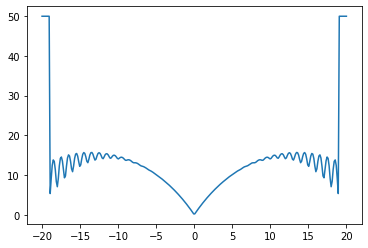

In [39]:
import matplotlib.pylab as plt
tak = tuned_ackley()
xs = np.linspace(-20, 20, 300)
fs = []
for x in xs:
    fs.append(tak.func([x, 0]))
plt.plot(xs, fs)

## summary on tuned ackley
| --      | adam | line search | original CMA | line search - CMA | adam-CMA | no optimisation |
| --      | --   |          -- | --           | --                |       -- |              -- |
| #experiments | <td colspan=3>150 times of optimisation</td> 
|total time          |  0.36 s | 0.12 s      | 12.6s       |  199 s        |     818 s   |   0.012 s      |
|evalutaions per exp | 0.052 k | 39.9 k evals|1.46 k evals |  70.9 k evals |156.4 k evals|   1 evals |  
|*performance*       |     -- | --          |          -- |            -- | --          | --            |
|cost                | 21.69  |  19.98      |   19.82     | 11.73         |     16.27   |      25.74    |
|probability         | 0      |     0       |    3%.      |     41%       |       19%   |        0      | 



## original cma + tuned ackley

In [ ]:
np.random.seed(2311)

# init multiple experiments
exps5 = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
tak = tuned_ackley()
exp.set_objective(tak)

# One experiment: setup optimizer
cma = cma_es()
paras = {'mean0': np.zeros((2,)),
         'std': np.ones((2,)) * 3, 
         'tol': 1e-5, 
         'adjust_func': do_nothing(), 
         'record': False, 
         'verbose': False}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps5.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 5,
             'size': 10,
             'sym': True}
exps5.set_sample_zone(expsParas)

%time data5 = exps5.do()

## line-search-cma + tuned Ackley

In [ ]:
np.random.seed(2311)

# init multiple experiments
exps6 = multiple_experiment()

# init and setup one experiment
exp = single_experiment()

# One experiment: setup objective function
tak = tuned_ackley()
exp.set_objective(tak)

# One experiment: setup optimizer
cma = cma_es()
paras = {'mean0': np.zeros((2,)),
         'std': np.ones((2,)) * 3, 
         'tol': 1e-5, 
         'adjust_func': line_search(), 
         'record': False, 
         'verbose': True}
cma.set_parameters(paras)
exp.set_optimizer(cma)

# Multiple experiment: setup one expreiment
exps6.set_single_exp(exp)


# Multiple experiments: setup sample zone of multiple experiments
expsParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 5,
             'size': 10,
             'sym': True}
exps6.set_sample_zone(expsParas)

%time data6 = exps6.do()